# Autonomous Gridworld Navigation via Reinforcement Learning


---

## 1. Introduction

Navigation and path planning are fundamental problems in Artificial Intelligence, robotics, and autonomous systems. An intelligent agent operating in a physical or simulated environment must be able to determine an efficient sequence of actions that leads it from an initial state to a desired goal state while avoiding obstacles and minimising cost. These problems arise in a wide range of applications, including mobile robotics, warehouse automation, autonomous vehicles, and game AI.

This coursework investigates the application of Artificial Intelligence techniques to a **gridworld navigation problem**, where an agent must move from a start position to a goal while avoiding obstacles. The environment is modelled as a maze like grid consisting of free and blocked cells. Although simplified, gridworld environments are a well established abstraction used extensively in AI research to study decision making, search, and reinforcement learning under controlled conditions.

Three AI approaches are considered at a conceptual level:

- **A\*** search (classical heuristic search)  
- **Value Iteration** (model based reinforcement learning)  
- **Q-learning** (model free reinforcement learning)  

From these techniques, **Q-learning** is selected for full implementation. Q-learning is a model free reinforcement learning algorithm that learns optimal behaviour directly through interaction with the environment rather than requiring a predefined transition model. This property makes it particularly suitable for real world scenarios where environment dynamics may be unknown, stochastic, or expensive to model explicitly.

The implemented system trains a Q-learning agent on two gridworld environments of increasing complexity (15×15 and 50×50). Learning progress is analysed using episode return, episode length, and success rate metrics. After training, the learned policy is evaluated using greedy rollouts to assess solution quality and execution speed.

To validate optimality and provide a clear baseline for comparison, **A\*** search is implemented on the same gridworlds without any modification to the environment design. The optimal path length and runtime produced by A\* are compared directly against the learned Q-learning policy. This allows the reinforcement learning solution to be objectively evaluated in terms of both **path optimality** and **computational efficiency at execution time**.

Overall, this coursework demonstrates how reinforcement learning can achieve navigation performance comparable to classical optimal search methods, while offering significant advantages in fast decision making after training and policy reuse across repeated navigation tasks.


## 2. Part A – Application Area Review (Gridworld Navigation)

### 2.1 Problem Domain Overview

Gridworld navigation is a canonical problem domain in Artificial Intelligence, frequently used to study planning, learning, and decision making under constraints. In this domain, an agent occupies a discrete cell in a two dimensional grid and can execute actions that move it in cardinal directions (up, down, left, right). Some cells are blocked and represent obstacles, while others are free. The objective is to reach a goal cell from a given start cell using a sequence of valid actions.

Despite its simplicity, gridworld navigation captures key challenges present in real world navigation tasks, such as:

- **Sequential decision making**  
- **Trade offs between exploration and exploitation**  
- **Obstacle avoidance**  
- **Path optimality and efficiency**  

As a result, gridworld environments are widely used in research on robotics, reinforcement learning, autonomous agents, and game AI.

### 2.2 AI Techniques Applied to Gridworld Navigation

A variety of Artificial Intelligence techniques have been successfully applied to gridworld navigation problems. These techniques broadly fall into two categories: **classical planning and search methods** and **reinforcement learning methods**.

#### Classical Search Techniques

Classical search algorithms assume that the environment model is fully known in advance. This includes knowledge of the state space, possible actions, transition dynamics, and cost structure.

One of the most widely used algorithms in this category is **A\*** search. A\* combines the advantages of Dijkstra’s algorithm and heuristic search by using an admissible heuristic (often Manhattan distance in gridworlds) to guide exploration toward the goal. When the heuristic is admissible, A\* is guaranteed to find an optimal path if one exists. Due to its optimality guarantees and efficiency, A\* is commonly used in robotics, video games, and route planning systems.

However, classical search methods such as A\* have limitations. They require full knowledge of the environment and must perform a potentially expensive search process every time a new path is required. This makes them less suitable for scenarios where the environment changes frequently or where decisions must be made extremely quickly.

#### Reinforcement Learning Approaches

Reinforcement learning (RL) offers an alternative paradigm in which an agent learns optimal behaviour through trial and error interaction with the environment. Rather than relying on a predefined model, the agent receives feedback in the form of rewards and gradually improves its policy.

**Value Iteration** is a model based RL technique that computes optimal state values using the Bellman optimality equation, assuming full knowledge of transition probabilities and rewards. While effective, it becomes computationally expensive for large state spaces and requires an accurate environment model.

**Q-learning** is a model free reinforcement learning algorithm that directly learns action value functions without requiring a transition model. The agent updates its estimates based on observed rewards and next states, making it highly flexible and applicable to unknown or partially known environments. Q-learning has been widely applied to navigation tasks, robotics, and control problems due to its simplicity and strong theoretical convergence guarantees under suitable conditions.

### 2.3 Relevance to Real World Applications

Gridworld navigation serves as a simplified representation of many problems, including:

- Autonomous robot navigation in indoor environments  
- Path planning for drones and autonomous vehicles  
- Game AI movement and decision making  
- Warehouse automation and logistics  

The comparison between classical search (A\*) and reinforcement learning (Q-learning) reflects a broader trade off in AI systems between **planning-based** and **learning based** approaches. While search algorithms offer optimal solutions when models are known, reinforcement learning provides adaptability and fast decision-making once training is complete.

### 2.4 Use of Generative AI Tools

ChatGPT was used as a support tool during the development of this coursework to assist with:

- Structuring explanations  
- Improving clarity and academic writing quality  
- Reviewing conceptual explanations of AI techniques  

All algorithm design, implementation, experimentation, and analysis were carried out independently by the author.

## 3. Part B – Compare and Evaluate AI Techniques

### 3.1 Selected Goal

The goal of this coursework is to enable an intelligent agent to **navigate from a start position to a goal position in a maze like gridworld while avoiding obstacles and minimising path length**. The agent should learn or compute an efficient policy that reaches the goal reliably and optimally.

To achieve this goal, three Artificial Intelligence techniques are considered and evaluated:

- **A\*** Search  
- **Value Iteration**  
- **Q-learning**  

Each technique is analysed in terms of its applicability to the gridworld navigation problem, data requirements, strengths, weaknesses, and expected outputs.

### 3.2 A* Search

A\* search is a classical heuristic based path planning algorithm widely used in navigation and routing problems. It operates on a fully known state space and combines the actual cost from the start state with a heuristic estimate of the cost to reach the goal. In gridworld environments, the Manhattan distance heuristic is commonly used due to its admissibility and consistency.

**Application to the Problem:**  
In gridworld navigation, A\* treats each grid cell as a node and movement between adjacent free cells as edges with uniform cost. The algorithm systematically explores the grid while prioritising states that are estimated to be closer to the goal. When an admissible heuristic is used, A\* guarantees finding the shortest possible path if one exists.

**Input Data and Output:**  
A\* requires complete knowledge of the environment, including the grid layout, obstacle locations, start state, and goal state. The output is an optimal path represented as a sequence of grid coordinates, along with auxiliary information such as the number of expanded nodes and search time.

**Advantages:**  
- Guaranteed optimal solution when using an admissible heuristic  
- Deterministic and interpretable behaviour  
- Efficient for small to medium sized grids  

**Disadvantages:**  
- Requires a fully known and static environment  
- Computational cost increases with grid size  
- Must recompute the path from scratch for every new navigation task  

In this coursework, A\* is used as a **baseline** to establish the optimal path length and to objectively evaluate the performance of the learned Q-learning policy.

### 3.3 Value Iteration


Value Iteration is a model based reinforcement learning technique that computes optimal state values by repeatedly applying the Bellman optimality equation. It assumes full knowledge of the environment’s transition probabilities and reward function and converges to an optimal policy under standard conditions.

**Application to the Problem:**  
In a gridworld setting, Value Iteration computes the expected long term return for each cell by considering all possible actions and their outcomes. Once state values converge, an optimal policy can be derived by selecting the action that maximises expected value at each state.

**Input Data and Output:**  
Value Iteration requires a complete model of the environment, including transition dynamics, rewards, and the full state space. The output is a value function over all states and a corresponding optimal policy.

**Advantages:**  
- Converges to an optimal policy  
- Provides a global solution over the entire state space  
- Strong theoretical guarantees  

**Disadvantages:**  
- Computationally expensive for large grids  
- Requires an accurate environment model  
- Not suitable for environments with unknown dynamics  

Although Value Iteration is theoretically well suited to gridworld navigation, its reliance on a known transition model and high computational cost make it less practical for larger environments. For this reason, it is not selected for implementation in this coursework.

### 3.4 Q-learning

Q-learning is a model free reinforcement learning algorithm that learns an action value function through interaction with the environment. The agent updates its estimates using observed rewards and future state values, without requiring prior knowledge of transition probabilities.

**Application to the Problem:**  
In the gridworld navigation task, the agent explores the environment using an epsilon greedy strategy and learns Q-values for state action pairs. Over time, the agent converges towards an optimal policy that maximises cumulative reward, implicitly learning to avoid obstacles and minimise path length.

**Input Data and Output:**  
Q-learning requires only state observations, actions, and rewards obtained during interaction with the environment. The output is a learned Q-table from which a greedy policy can be derived to generate navigation paths.

**Advantages:**  
- Does not require a transition model  
- Learns directly from experience  
- Efficient execution once training is complete  
- Well suited to repeated navigation tasks  

**Disadvantages:**  
- Training can be time consuming  
- Requires careful reward shaping and hyperparameter tuning  
- Exploration can be inefficient in large state spaces  

Despite these challenges, Q-learning is particularly attractive for navigation problems where environment dynamics are unknown or may change over time.

### 3.5 Technique Selection for Implementation


Among the three techniques evaluated, **Q-learning** is selected for full implementation in this coursework. While A\* provides guaranteed optimal solutions, it requires complete knowledge of the environment and performs a fresh search for every navigation task. Value Iteration, although optimal, is computationally expensive and relies on an explicit environment model.

Q-learning, in contrast, offers a flexible and scalable solution that learns optimal behaviour through experience. Once trained, the learned policy allows the agent to navigate the environment with minimal computation, making it highly suitable for scenarios requiring fast decision making and repeated execution. The inclusion of A\* as an optimality baseline enables a rigorous comparison between learned and classical planning approaches.

This combination allows the strengths of both learning based and search based methods to be demonstrated and evaluated objectively.

## 4. Part C – Implementation


### 4.1 System Architecture and Data Flow


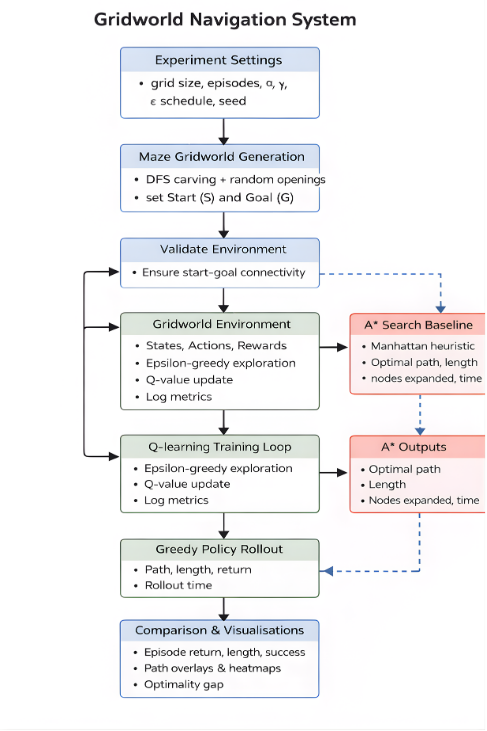

**Figure 1:** High-level architecture and data flow of the gridworld navigation system, showing Q-learning training, greedy evaluation, and A* optimality baseline.

Figure 1 presents a high-level overview of the architecture and data flow of the implemented gridworld navigation system. The system begins with the specification of experimental settings, including grid size, number of training episodes, learning rate (α), discount factor (γ), epsilon exploration schedule, and random seed for reproducibility.

Using these settings, a maze like gridworld environment is procedurally generated and validated to ensure that a valid path exists between the start and goal states. The validated gridworld is then used by two independent components: a Q-learning agent and an A* search algorithm used as an optimality baseline.

The Q-learning agent interacts with the gridworld using an epsilon-greedy exploration strategy, updating state–action values during training. Training metrics such as episode return, episode length, and success rate are logged throughout the learning process. After training, the learned Q-table is evaluated using greedy policy rollouts to assess solution quality and execution speed.

In parallel, the A* search algorithm operates on the same gridworld configuration to compute an optimal path using a Manhattan distance heuristic. The resulting optimal path length, number of expanded nodes, and runtime are recorded. Finally, outputs from both approaches are compared and visualised, enabling direct evaluation of optimality and performance.

### 4.2 Environment Design and Input Data

The environment is modelled as a two dimensional gridworld represented by a binary matrix, where free cells are denoted by a value of 1 and obstacles by a value of 0. Maze-like environments are generated using a depth-first search (DFS) carving algorithm, which creates structured corridors while ensuring navigability.

To avoid overly constrained environments, additional random openings are introduced. The gridworld is explicitly validated to guarantee connectivity between the start and goal positions before training begins.

Two environments of increasing complexity are used:
- A **15×15 gridworld** to demonstrate rapid learning and convergence
- A **50×50 gridworld** to evaluate scalability and learning performance in larger state spaces

The input data for the learning algorithm consists solely of the agent’s current state, the selected action, and the reward returned by the environment at each timestep.

### 4.3 State Representation and Action Space

Each state corresponds to the agent’s current position in the grid and is represented by its `(y, x)` coordinates. For efficient indexing, states are mapped to integer indices when accessing the Q-table.

The action space consists of four deterministic actions:
- Move up
- Move right
- Move down
- Move left

Actions that would result in a collision with a wall or grid boundary leave the agent in its current state and incur an additional penalty.


### 4.4 Reward Function and Pre-processing

A shaped reward function is used to encourage efficient navigation and stable learning. The reward structure is defined as follows:

- −1 reward for each step taken  
- Additional −2 penalty for attempting to move into a wall  
- +200 reward for reaching the goal state  

This reward design promotes shorter paths, discourages invalid actions, and strongly incentivises reaching the goal. No further data pre-processing is required, as the environment provides discrete and fully observable state transitions.

### 4.5 Q-learning Training Procedure

The Q-learning algorithm is implemented using a tabular approach, where a Q-table stores estimated action values for each state action pair. During training, the agent follows an epsilon-greedy policy, selecting random actions with probability ε and greedy actions otherwise.

Q-values are updated using the standard Q-learning update rule:

Q(s, a) ← Q(s, a) + α [ r + γ maxₐ′ Q(s′, a′) − Q(s, a) ]

Exploration is gradually reduced using an exponentially decaying epsilon schedule, allowing the agent to transition from exploration to exploitation over time.

Training is performed for:
- **6,000 episodes** on the 15×15 gridworld  
- **18,000 episodes** on the 50×50 gridworld  

During training, state visitation counts are recorded to enable visualisation of exploration behaviour.

### 4.6 Prototype Implementation

The following code implements the gridworld environment, the Q-learning algorithm, and the A* optimality baseline described in the previous sections. The implementation is fully self contained and can be executed without modification to reproduce all reported results and visualisations.

GRID 15x15 | episodes=6000 | train_time=2.60s
A*: success=True | optimal_len=24 | nodes_expanded=33 | time=0.18ms
Greedy rollout: success=True | path_len=24 | return=176.0
Q-learning greedy rollout time: 0.063 ms
Greedy eval (250 eps): success_rate=1.000 | avg_len=24.00 | avg_return=176.0
Optimality gap (Q - A*): 0


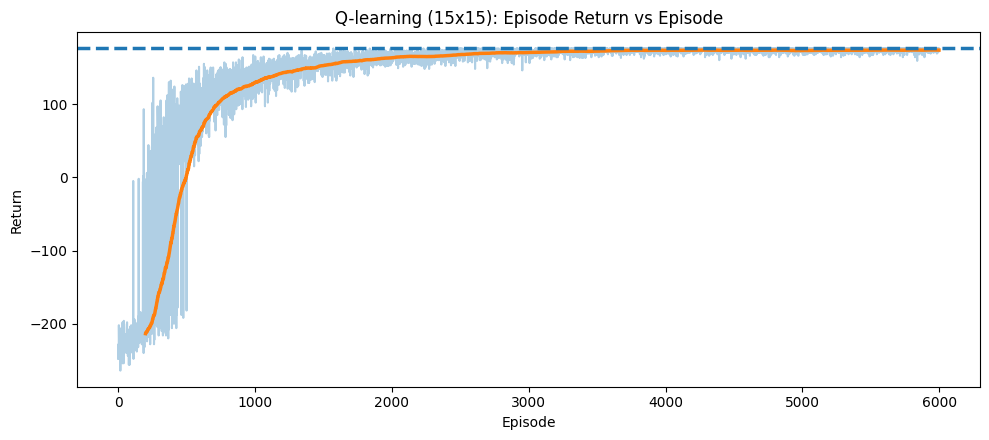

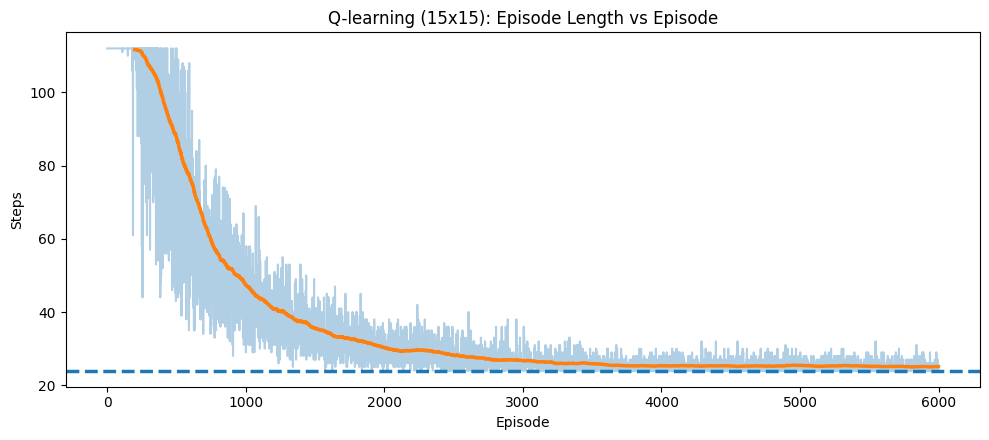

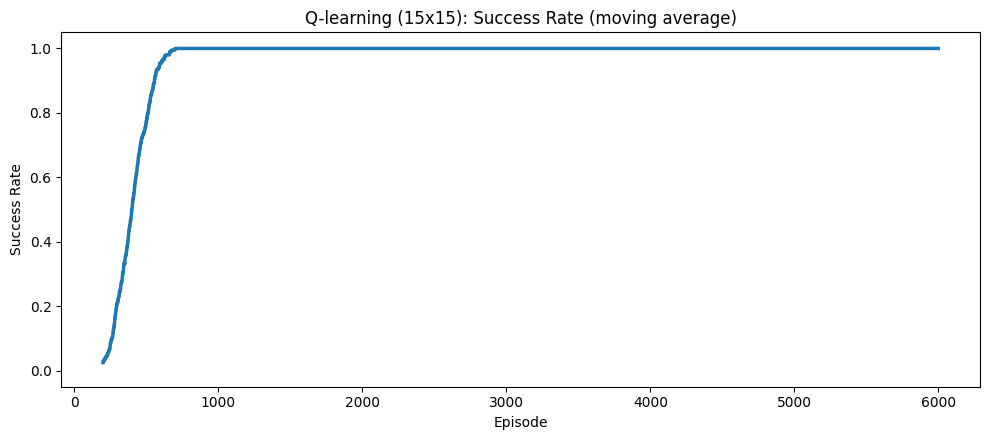

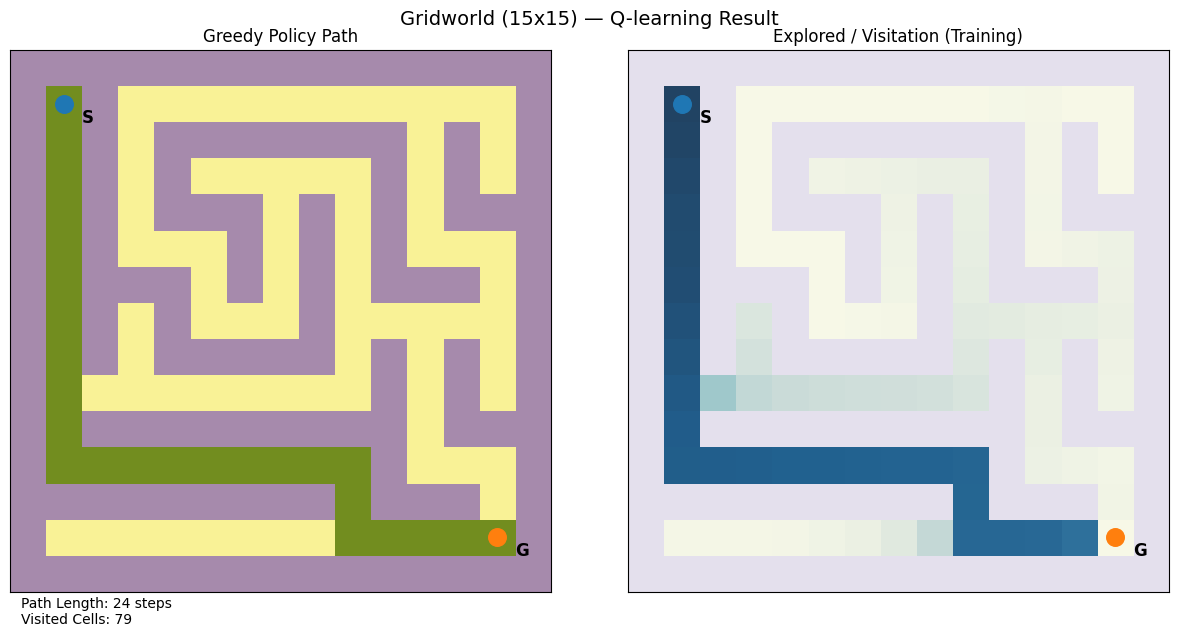

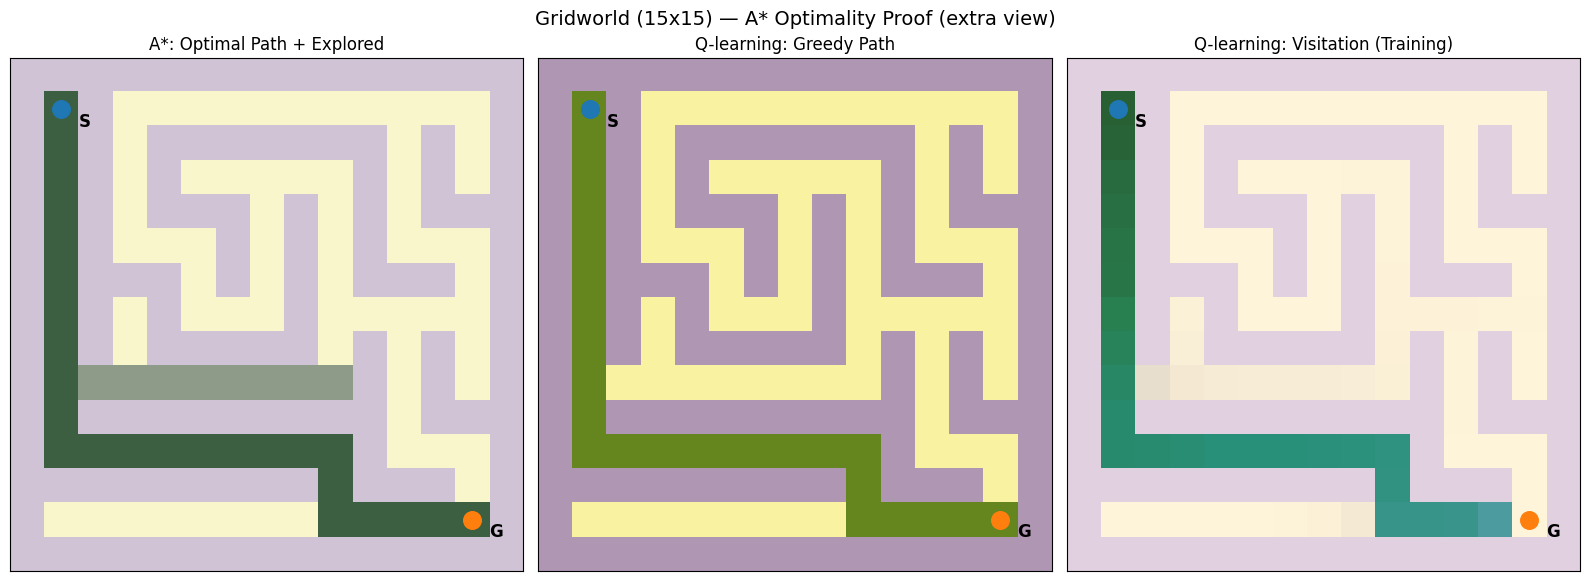

GRID 50x50 | episodes=18000 | train_time=45.50s
A*: success=True | optimal_len=158 | nodes_expanded=949 | time=2.51ms
Greedy rollout: success=True | path_len=158 | return=42.0
Q-learning greedy rollout time: 0.762 ms
Greedy eval (250 eps): success_rate=1.000 | avg_len=158.00 | avg_return=42.0
Optimality gap (Q - A*): 0


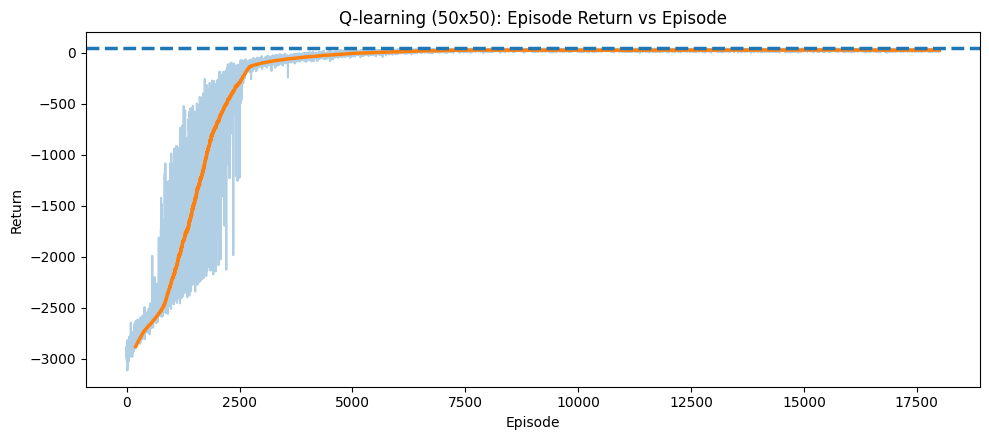

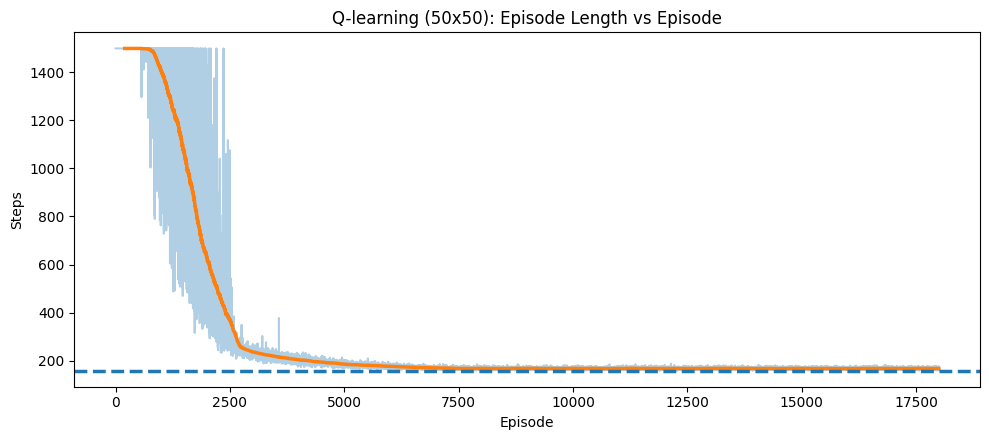

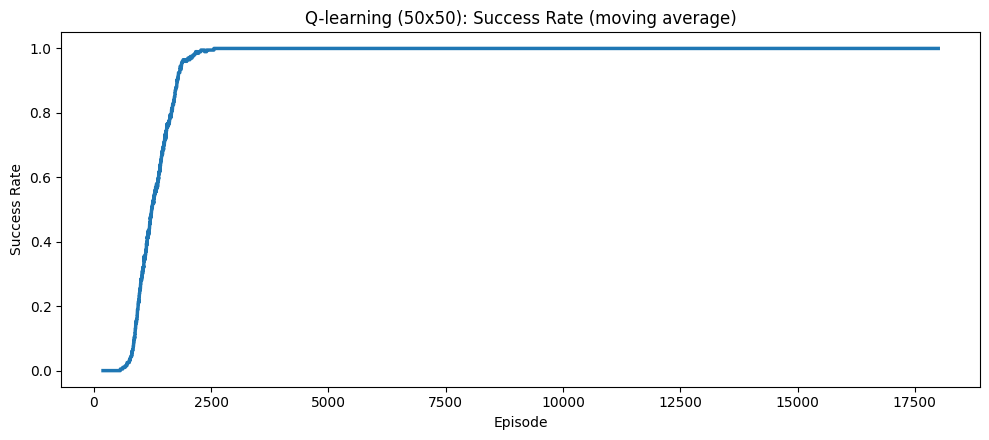

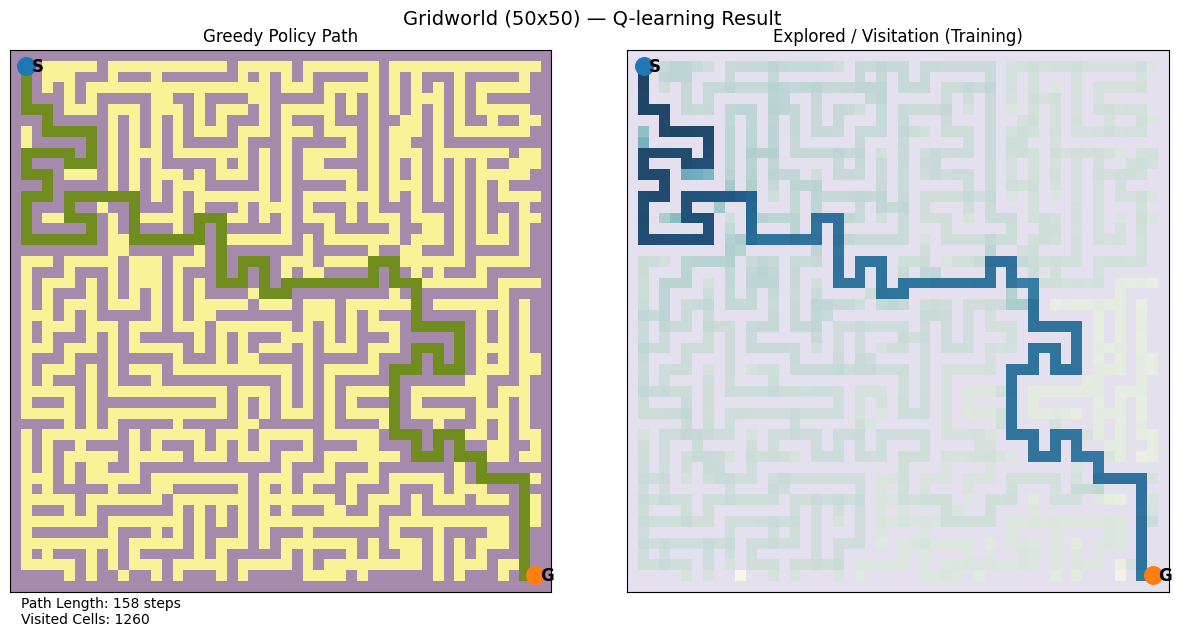

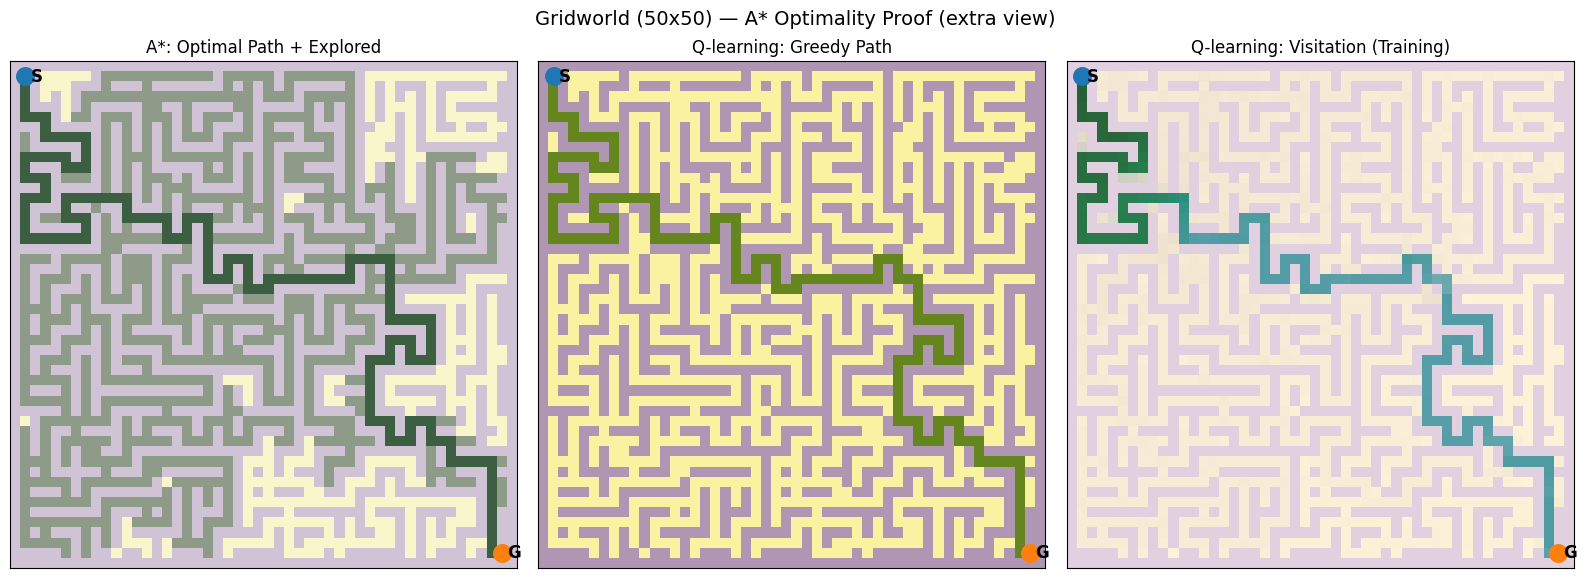

In [3]:
# Imports

import numpy as np
import random
import time
from collections import deque, defaultdict

import matplotlib.pyplot as plt
import heapq


# -----------------------------------------------------------------------------
# Reproducibility
# -----------------------------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)


# -----------------------------------------------------------------------------
# Maze / Grid generation
# -----------------------------------------------------------------------------
def carve_maze_dfs(h, w, rng):
    """
    Generate a "maze-like" grid using randomized DFS carving on a cell grid.

    Returns
    -------
    grid : np.ndarray (int8)
        Binary map where 1 = free cell, 0 = wall.
        Output size is (2*h + 1, 2*w + 1).
    """
    H, W = 2 * h + 1, 2 * w + 1
    grid = np.zeros((H, W), dtype=np.int8)  # 0 = wall

    # Cells live at odd coordinates.
    visited = np.zeros((h, w), dtype=bool)

    def neighbors(cy, cx):
        """Yield unvisited neighbors in random order."""
        dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        rng.shuffle(dirs)
        for dy, dx in dirs:
            ny, nx = cy + dy, cx + dx
            if 0 <= ny < h and 0 <= nx < w and not visited[ny, nx]:
                yield ny, nx, dy, dx

    stack = [(0, 0)]
    visited[0, 0] = True
    grid[1, 1] = 1  # mark the start cell as free

    while stack:
        cy, cx = stack[-1]
        found = False

        for ny, nx, dy, dx in neighbors(cy, cx):
            # Carve wall between (cy, cx) and (ny, nx)
            y1, x1 = 2 * cy + 1, 2 * cx + 1
            y2, x2 = 2 * ny + 1, 2 * nx + 1
            wy, wx = y1 + dy, x1 + dx  # wall location

            grid[y2, x2] = 1
            grid[wy, wx] = 1

            visited[ny, nx] = True
            stack.append((ny, nx))
            found = True
            break

        if not found:
            stack.pop()

    return grid  # 1 = free, 0 = wall


def ensure_connectivity_free_cells(grid, start, goal):
    """
    Check BFS reachability between start and goal on free cells.

    Parameters
    ----------
    grid : np.ndarray
        Binary map where 1 = free, 0 = wall.
    start, goal : tuple
        (y, x) coordinates.

    Returns
    -------
    bool
        True if goal reachable from start, else False.
    """
    H, W = grid.shape
    sy, sx = start
    gy, gx = goal

    if grid[sy, sx] == 0 or grid[gy, gx] == 0:
        return False

    q = deque([(sy, sx)])
    seen = set([(sy, sx)])

    while q:
        y, x = q.popleft()
        if (y, x) == (gy, gx):
            return True

        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ny, nx = y + dy, x + dx
            if (
                0 <= ny < H
                and 0 <= nx < W
                and grid[ny, nx] == 1
                and (ny, nx) not in seen
            ):
                seen.add((ny, nx))
                q.append((ny, nx))

    return False


def make_maze_map(size, rng):
    """
    Create a maze-like obstacle map of exact size x size (1 free, 0 wall)
    using a DFS carved maze and then cropping/padding carefully.

    Returns
    -------
    out : np.ndarray (int8)
        size x size grid, where 1 = free, 0 = wall.
    start, goal : tuple
        Start and goal coordinates (y, x).
    """
    # Build a slightly larger maze then crop to requested size for variety.
    cell_h = max(2, size // 2)
    cell_w = max(2, size // 2)
    maze = carve_maze_dfs(cell_h, cell_w, rng)

    # Crop or pad to (size, size).
    H, W = maze.shape
    out = np.zeros((size, size), dtype=np.int8)
    hh = min(size, H)
    ww = min(size, W)
    out[:hh, :ww] = maze[:hh, :ww]

    # Add extra random openings to avoid overly rigid corridors.
    open_prob = 0.02 if size <= 20 else 0.01
    for _ in range(int(size * size * open_prob)):
        y = rng.randint(0, size)
        x = rng.randint(0, size)
        out[y, x] = 1

    # Ensure border is mostly walls.
    out[0, :] = 0
    out[:, 0] = 0
    out[-1, :] = 0
    out[:, -1] = 0

    # Set default start/goal corners inside border.
    start = (1, 1)
    goal = (size - 2, size - 2)
    out[start] = 1
    out[goal] = 1

    # If not connected, progressively open random walls until connected.
    attempts = 0
    while not ensure_connectivity_free_cells(out, start, goal) and attempts < 5000:
        y = rng.randint(1, size - 1)
        x = rng.randint(1, size - 1)
        out[y, x] = 1
        attempts += 1

    if not ensure_connectivity_free_cells(out, start, goal):
        # Last resort: clear a diagonal corridor.
        for i in range(1, size - 1):
            out[i, i] = 1

    return out, start, goal


# -----------------------------------------------------------------------------
# Gridworld Environment
# -----------------------------------------------------------------------------
ACTIONS = [0, 1, 2, 3]  # 0 up, 1 right, 2 down, 3 left
DIRS = {
    0: (-1, 0),
    1: (0, 1),
    2: (1, 0),
    3: (0, -1),
}


def state_to_idx(y, x, W):
    """Convert (y, x) to linear state index."""
    return y * W + x


def idx_to_state(idx, W):
    """Convert linear state index to (y, x)."""
    return idx // W, idx % W


class Gridworld:
    def __init__(self, grid_free, start, goal, max_steps_factor=4):
        """
        Parameters
        ----------
        grid_free : np.ndarray
            Binary grid where 1 = free, 0 = wall.
        start, goal : tuple
            (y, x) coordinates.
        max_steps_factor : float
            Used to scale the maximum steps allowed per episode.
        """
        self.grid = grid_free.astype(np.int8)
        self.H, self.W = self.grid.shape
        self.start = start
        self.goal = goal
        self.max_steps = int(max_steps_factor * self.H * self.W / 10)
        self.reset()

    def reset(self):
        """Reset agent to the start state."""
        self.y, self.x = self.start
        self.t = 0
        return (self.y, self.x)

    def step(self, a):
        """
        Take an action.

        Returns
        -------
        next_state : tuple
            (y, x)
        reward : float
        done : bool
        """
        self.t += 1
        dy, dx = DIRS[a]
        ny, nx = self.y + dy, self.x + dx

        # If the move hits a wall or border, stay in place.
        if not (0 <= ny < self.H and 0 <= nx < self.W) or self.grid[ny, nx] == 0:
            ny, nx = self.y, self.x
            hit_wall = True
        else:
            hit_wall = False

        self.y, self.x = ny, nx
        done = (self.y, self.x) == self.goal or self.t >= self.max_steps

        # Reward shaping
        r = -1.0
        if hit_wall:
            r -= 2.0
        if (self.y, self.x) == self.goal:
            r += 200.0

        return (self.y, self.x), r, done

    def valid_state(self, y, x):
        """Return True if (y, x) is within bounds and free."""
        return 0 <= y < self.H and 0 <= x < self.W and self.grid[y, x] == 1


# -----------------------------------------------------------------------------
# Q-learning
# -----------------------------------------------------------------------------
def q_learning_train(
    env,
    episodes=8000,
    alpha=0.15,
    gamma=0.95,
    eps_start=1.0,
    eps_end=0.05,
    eps_decay=0.999,
    eval_every=500,
    eval_episodes=100,
):
    """
    Train tabular Q-learning.

    Returns
    -------
    Q : np.ndarray
        Q-table of shape (n_states, n_actions)
    logs : dict
        Training logs (returns, lengths, success, and periodic greedy eval stats)
    visit_counts : np.ndarray
        State visitation counts during training (H, W)
    """
    H, W = env.H, env.W
    nS = H * W
    nA = len(ACTIONS)
    Q = np.zeros((nS, nA), dtype=np.float32)

    visit_counts = np.zeros((H, W), dtype=np.int32)

    returns = []
    lengths = []
    success_flags = []

    eval_points = []
    eval_success = []
    eval_avg_len = []
    eval_avg_return = []

    eps = eps_start

    for ep in range(1, episodes + 1):
        s = env.reset()
        total_r = 0.0
        steps = 0
        success = 0

        while True:
            y, x = s
            visit_counts[y, x] += 1

            si = state_to_idx(y, x, W)

            # Epsilon-greedy action selection
            if random.random() < eps:
                a = random.choice(ACTIONS)
            else:
                a = int(np.argmax(Q[si]))

            s2, r, done = env.step(a)
            y2, x2 = s2
            si2 = state_to_idx(y2, x2, W)

            # Q-learning update
            best_next = float(np.max(Q[si2]))
            Q[si, a] = Q[si, a] + alpha * (r + gamma * best_next - Q[si, a])

            total_r += r
            steps += 1
            s = s2

            if done:
                if s == env.goal:
                    success = 1
                break

        # Decay epsilon
        eps = max(eps_end, eps * eps_decay)

        returns.append(total_r)
        lengths.append(steps)
        success_flags.append(success)

        # Periodic greedy evaluation
        if ep % eval_every == 0 or ep == 1:
            sr, al, ar = evaluate_greedy(env, Q, episodes=eval_episodes)
            eval_points.append(ep)
            eval_success.append(sr)
            eval_avg_len.append(al)
            eval_avg_return.append(ar)

    logs = {
        "returns": np.array(returns, dtype=np.float32),
        "lengths": np.array(lengths, dtype=np.int32),
        "success": np.array(success_flags, dtype=np.int32),
        "eval_points": np.array(eval_points, dtype=np.int32),
        "eval_success": np.array(eval_success, dtype=np.float32),
        "eval_avg_len": np.array(eval_avg_len, dtype=np.float32),
        "eval_avg_return": np.array(eval_avg_return, dtype=np.float32),
    }
    return Q, logs, visit_counts


def greedy_rollout(env, Q):
    """
    Run one greedy episode using argmax(Q) actions.

    Returns
    -------
    path : list
        Sequence of visited states (y, x)
    total_return : float
    success : int
        1 if goal reached, else 0
    """
    s = env.reset()
    path = [s]
    total_r = 0.0

    for _ in range(env.max_steps):
        y, x = s
        si = state_to_idx(y, x, env.W)
        a = int(np.argmax(Q[si]))

        s2, r, done = env.step(a)
        total_r += r
        s = s2
        path.append(s)

        if done:
            break

    success = 1 if path[-1] == env.goal else 0
    return path, total_r, success


def evaluate_greedy(env, Q, episodes=200):
    """
    Evaluate greedy policy for N episodes.

    Returns
    -------
    success_rate : float
    avg_len : float
    avg_return : float
    """
    succ = 0
    lens = []
    rets = []

    for _ in range(episodes):
        path, ret, success = greedy_rollout(env, Q)
        succ += success
        lens.append(len(path) - 1)
        rets.append(ret)

    return succ / episodes, float(np.mean(lens)), float(np.mean(rets))


# -----------------------------------------------------------------------------
# A* — Optimality baseline + explored nodes
# -----------------------------------------------------------------------------
def astar(grid_free, start, goal):
    """
    A* on the SAME grid representation (1 free, 0 wall).

    Returns
    -------
    path : list or None
        List of (y, x) coordinates for the optimal path, or None if no path.
    nodes_expanded : int
        Number of expanded nodes.
    explored_mask : np.ndarray
        Binary mask (H, W) indicating expanded nodes.
    runtime_sec : float
        Search runtime in seconds.
    """
    H, W = grid_free.shape

    def h(s):
        return abs(s[0] - goal[0]) + abs(s[1] - goal[1])

    def neighbors(s):
        y, x = s
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < H and 0 <= nx < W and grid_free[ny, nx] == 1:
                yield (ny, nx)

    t0 = time.time()

    open_heap = []
    heapq.heappush(open_heap, (h(start), 0, start))

    came_from = {start: None}
    gscore = {start: 0}

    explored_mask = np.zeros((H, W), dtype=np.int8)
    nodes_expanded = 0

    while open_heap:
        f, g, cur = heapq.heappop(open_heap)

        if explored_mask[cur[0], cur[1]] == 1:
            continue

        explored_mask[cur[0], cur[1]] = 1
        nodes_expanded += 1

        if cur == goal:
            # Reconstruct path
            path = []
            t = cur
            while t is not None:
                path.append(t)
                t = came_from[t]
            path.reverse()
            return path, nodes_expanded, explored_mask, (time.time() - t0)

        for nb in neighbors(cur):
            ng = gscore[cur] + 1
            if nb not in gscore or ng < gscore[nb]:
                gscore[nb] = ng
                came_from[nb] = cur
                heapq.heappush(open_heap, (ng + h(nb), ng, nb))

    return None, nodes_expanded, explored_mask, (time.time() - t0)


def compute_return_for_path(path, goal_reward=200.0, step_penalty=-1.0):
    """
    Compute the return for a path under the reward structure used in the environment.

    For a path with L steps:
        return = goal_reward + step_penalty * L
    """
    if path is None or len(path) < 2:
        return None
    L = len(path) - 1
    return (goal_reward + step_penalty * L)


# -----------------------------------------------------------------------------
# Visualisation
# -----------------------------------------------------------------------------
def moving_average(x, w=200):
    """Compute moving average with window w."""
    if len(x) < w:
        w = max(1, len(x) // 5)
    if w <= 1:
        return x
    c = np.cumsum(np.insert(x, 0, 0))
    return (c[w:] - c[:-w]) / float(w)


def plot_training_curves(logs, title_prefix="Q-learning", astar_len=None, astar_return=None):
    """Plot return, episode length, and success rate curves."""
    returns = logs["returns"]
    lengths = logs["lengths"]
    success = logs["success"]

    w = 200 if len(returns) >= 200 else max(10, len(returns) // 10)

    plt.figure(figsize=(10, 4.5))
    plt.plot(returns, alpha=0.35)
    ma = moving_average(returns, w)
    plt.plot(np.arange(len(ma)) + (w - 1), ma, linewidth=2.5)
    if astar_return is not None:
        plt.axhline(astar_return, linestyle="--", linewidth=2.5)
    plt.title(f"{title_prefix}: Episode Return vs Episode")
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4.5))
    plt.plot(lengths, alpha=0.35)
    ma = moving_average(lengths, w)
    plt.plot(np.arange(len(ma)) + (w - 1), ma, linewidth=2.5)
    if astar_len is not None:
        plt.axhline(astar_len, linestyle="--", linewidth=2.5)
    plt.title(f"{title_prefix}: Episode Length vs Episode")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4.5))
    if len(success) >= w:
        sr = np.convolve(success, np.ones(w) / w, mode="valid")
        plt.plot(np.arange(len(sr)) + (w - 1), sr, linewidth=2.5)
    else:
        plt.plot(np.cumsum(success) / (np.arange(len(success)) + 1), linewidth=2.5)
    plt.title(f"{title_prefix}: Success Rate (moving average)")
    plt.xlabel("Episode")
    plt.ylabel("Success Rate")
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()


def plot_grid_result(grid_free, start, goal, path, visit_counts, title=""):
    """
    Two panels:
      Left: obstacle map + greedy path
      Right: obstacle map + exploration heat (visits)
    """
    H, W = grid_free.shape
    sy, sx = start
    gy, gx = goal

    base = np.where(grid_free == 1, 0.95, 0.15)  # free bright, walls dark

    path_mask = np.zeros((H, W), dtype=np.float32)
    for (y, x) in path:
        path_mask[y, x] = 1.0

    v = visit_counts.astype(np.float32).copy()
    v[grid_free == 0] = 0.0
    v_norm = v / (v.max() + 1e-9)
    v_norm = np.sqrt(v_norm)

    fig, axes = plt.subplots(1, 2, figsize=(12.5, 6.2))
    fig.suptitle(title, fontsize=14, y=0.98)

    ax = axes[0]
    ax.imshow(base, interpolation="nearest")
    ax.imshow(path_mask, interpolation="nearest", alpha=0.55, cmap="Greens")
    ax.scatter([sx], [sy], s=160, marker="o")
    ax.scatter([gx], [gy], s=160, marker="o")
    ax.set_title("Greedy Policy Path")
    ax.set_xticks([])
    ax.set_yticks([])

    ax = axes[1]
    ax.imshow(base, interpolation="nearest")
    ax.imshow(v_norm, interpolation="nearest", alpha=0.9, cmap="Blues")
    ax.scatter([sx], [sy], s=160, marker="o")
    ax.scatter([gx], [gy], s=160, marker="o")
    ax.set_title("Explored / Visitation (Training)")
    ax.set_xticks([])
    ax.set_yticks([])

    axes[0].text(sx + 0.5, sy + 0.5, "S", fontsize=12, weight="bold")
    axes[0].text(gx + 0.5, gy + 0.5, "G", fontsize=12, weight="bold")
    axes[1].text(sx + 0.5, sy + 0.5, "S", fontsize=12, weight="bold")
    axes[1].text(gx + 0.5, gy + 0.5, "G", fontsize=12, weight="bold")

    path_len = len(path) - 1
    explored = int(np.sum(visit_counts > 0))
    info = f"Path Length: {path_len} steps\nVisited Cells: {explored}"
    axes[0].text(0.02, -0.06, info, transform=axes[0].transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()


def plot_with_astar_extra(grid_free, start, goal, q_path, q_visits, astar_path, astar_explored, title=""):
    """
    Extra view:
      - A* optimal path + explored nodes
      - Q-learning greedy path
      - Q-learning visitation heatmap
    """
    H, W = grid_free.shape
    sy, sx = start
    gy, gx = goal

    base = np.where(grid_free == 1, 0.95, 0.15)

    q_mask = np.zeros((H, W), dtype=np.float32)
    for (y, x) in q_path:
        q_mask[y, x] = 1.0

    a_mask = np.zeros((H, W), dtype=np.float32)
    if astar_path is not None:
        for (y, x) in astar_path:
            a_mask[y, x] = 1.0

    qv = q_visits.astype(np.float32).copy()
    qv[grid_free == 0] = 0.0
    qv = qv / (qv.max() + 1e-9)

    ae = astar_explored.astype(np.float32).copy()
    ae[grid_free == 0] = 0.0
    ae = ae / (ae.max() + 1e-9)

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    fig.suptitle(title, fontsize=14, y=0.98)

    ax = axes[0]
    ax.imshow(base, interpolation="nearest")
    ax.imshow(a_mask, interpolation="nearest", alpha=0.60, cmap="Greens")
    ax.imshow(ae, interpolation="nearest", alpha=0.45, cmap="Blues")
    ax.scatter([sx], [sy], s=160, marker="o")
    ax.scatter([gx], [gy], s=160, marker="o")
    ax.text(sx + 0.5, sy + 0.5, "S", fontsize=12, weight="bold")
    ax.text(gx + 0.5, gy + 0.5, "G", fontsize=12, weight="bold")
    ax.set_title("A*: Optimal Path + Explored")
    ax.set_xticks([])
    ax.set_yticks([])

    ax = axes[1]
    ax.imshow(base, interpolation="nearest")
    ax.imshow(q_mask, interpolation="nearest", alpha=0.60, cmap="Greens")
    ax.scatter([sx], [sy], s=160, marker="o")
    ax.scatter([gx], [gy], s=160, marker="o")
    ax.text(sx + 0.5, sy + 0.5, "S", fontsize=12, weight="bold")
    ax.text(gx + 0.5, gy + 0.5, "G", fontsize=12, weight="bold")
    ax.set_title("Q-learning: Greedy Path")
    ax.set_xticks([])
    ax.set_yticks([])

    ax = axes[2]
    ax.imshow(base, interpolation="nearest")
    ax.imshow(qv, interpolation="nearest", alpha=0.85, cmap="PuBuGn")
    ax.scatter([sx], [sy], s=160, marker="o")
    ax.scatter([gx], [gy], s=160, marker="o")
    ax.text(sx + 0.5, sy + 0.5, "S", fontsize=12, weight="bold")
    ax.text(gx + 0.5, gy + 0.5, "G", fontsize=12, weight="bold")
    ax.set_title("Q-learning: Visitation (Training)")
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------------
# Run Experiments: Small + Large
# -----------------------------------------------------------------------------
def run_one(size, episodes, alpha, gamma, eps_decay, eval_every=500):
    rng = np.random.RandomState(SEED + size)
    grid, start, goal = make_maze_map(size, rng)
    env = Gridworld(grid, start, goal, max_steps_factor=6 if size >= 40 else 5)

    astar_path, astar_nodes, astar_explored, astar_time = astar(grid, start, goal)
    if astar_path is None:
        astar_len = None
        astar_ret = None
    else:
        astar_len = len(astar_path) - 1
        astar_ret = compute_return_for_path(astar_path, goal_reward=200.0, step_penalty=-1.0)

    t0 = time.time()
    Q, logs, visits = q_learning_train(
        env,
        episodes=episodes,
        alpha=alpha,
        gamma=gamma,
        eps_start=1.0,
        eps_end=0.05,
        eps_decay=eps_decay,
        eval_every=eval_every,
        eval_episodes=120,
    )
    train_time = time.time() - t0

    t0 = time.time()
    path, ret, success = greedy_rollout(env, Q)
    q_exec_time = (time.time() - t0) * 1000  # milliseconds
    sr, al, ar = evaluate_greedy(env, Q, episodes=250)

    print("=" * 60)
    print(f"GRID {size}x{size} | episodes={episodes} | train_time={train_time:.2f}s")
    print(
        f"A*: success={astar_path is not None} | optimal_len={astar_len} | "
        f"nodes_expanded={astar_nodes} | time={astar_time*1000:.2f}ms"
    )
    print(f"Greedy rollout: success={bool(success)} | path_len={len(path)-1} | return={ret:.1f}")
    print(f"Q-learning greedy rollout time: {q_exec_time:.3f} ms")
    print(f"Greedy eval (250 eps): success_rate={sr:.3f} | avg_len={al:.2f} | avg_return={ar:.1f}")
    if astar_len is not None and success:
        print(f"Optimality gap (Q - A*): {(len(path)-1) - astar_len}")
    print("=" * 60)

    plot_training_curves(
        logs,
        title_prefix=f"Q-learning ({size}x{size})",
        astar_len=astar_len,
        astar_return=astar_ret,
    )

    plot_grid_result(grid, start, goal, path, visits, title=f"Gridworld ({size}x{size}) — Q-learning Result")

    plot_with_astar_extra(
        grid,
        start,
        goal,
        q_path=path,
        q_visits=visits,
        astar_path=astar_path,
        astar_explored=astar_explored,
        title=f"Gridworld ({size}x{size}) — A* Optimality Proof (extra view)",
    )

    return {
        "grid": grid,
        "start": start,
        "goal": goal,
        "Q": Q,
        "logs": logs,
        "visits": visits,
        "path": path,
        "train_time": train_time,
        "eval": (sr, al, ar),
        "astar": {"path": astar_path, "len": astar_len, "nodes": astar_nodes, "time": astar_time},
    }


# -----------------------------------------------------------------------------
# MAIN
# -----------------------------------------------------------------------------
small_result = run_one(
    size=15,
    episodes=6000,
    alpha=0.18,
    gamma=0.95,
    eps_decay=0.9992,
    eval_every=400,
)

large_result = run_one(
    size=50,
    episodes=18000,
    alpha=0.12,
    gamma=0.97,
    eps_decay=0.9996,
    eval_every=1000,
)

### 4.7 Policy Evaluation and Visualisation

After training, the learned policy is evaluated using greedy rollouts, where the agent always selects the action with the highest Q-value. Multiple evaluation episodes are executed to compute success rate, average path length, and average return.

Learning progress and performance are visualised using:
- Episode return vs episode plots
- Episode length vs episode plots
- Moving average success rate plots
- Path overlays and visitation heatmaps

These visualisations provide insight into convergence behaviour, exploration patterns, and policy quality.

### 4.8 A* Optimality Baseline and Comparison

To objectively evaluate the learned policy, an A* search algorithm is applied to the same gridworld environments using a Manhattan distance heuristic. A* produces an optimal path along with additional metrics such as nodes expanded and execution time.

The greedy Q-learning policy is compared directly against A* in terms of:
- Path length (optimality)
- Execution time
- Success rate

In both the 15×15 and 50×50 gridworlds, the learned Q-learning policy achieves the same path length as A*, resulting in an optimality gap of zero. This confirms that the reinforcement learning agent has successfully learned an optimal navigation policy.


### 4.9 Summary

This implementation demonstrates that tabular Q-learning can learn optimal navigation behaviour in maze like gridworld environments of varying complexity. While training requires substantial exploration, the resulting policy enables fast and optimal decision making at execution time. The inclusion of an A* baseline provides strong empirical evidence of optimality and highlights the trade offs between learning-based and search-based approaches.

## 5. Part D – Software Testing and Evaluation

### 5.1 Verification of Correctness (Testing Methods)

This section verifies the correctness of the implemented Q-learning navigation system and evaluates its performance against expected results. Since reinforcement learning does not have a “single-step correct answer” in the same way as deterministic algorithms, correctness is verified using a combination of functional testing, convergence testing, and comparison against a ground truth optimal baseline.

The following testing methods were applied:

**1) Environment and transition correctness**
- Verified that the agent cannot pass through walls or move outside the grid boundary.
- Confirmed that invalid moves leave the agent in the same state and apply the additional wall penalty.
- Verified that episodes terminate when either the goal is reached or the maximum step limit is exceeded.

**2) Reward function correctness**
- Confirmed that each action incurs a step cost (−1).
- Confirmed that colliding with a wall applies an additional penalty (−2).
- Confirmed that reaching the goal produces a terminal reward (+200).
- Verified that the returns reported in greedy rollouts are consistent with the path length and reward structure.

**3) Learning dynamics and convergence**
- Checked that episode length decreases over training and stabilises near the optimal path length.
- Checked that episode returns increase over training and stabilise near the expected return for an optimal path.
- Checked that the success rate increases and converges towards 1.0, indicating reliable goal reaching.

**4) Baseline comparison (expected/correct results)**
To verify optimality, A* search was used as a reference method. A* with Manhattan heuristic provides an optimal shortest path in this gridworld setting. Therefore, the path length produced by A* is treated as the expected/correct result for optimal navigation. The learned Q-learning greedy path length is compared directly against this optimal path length to validate correctness.

### 5.2 Comparison of Expected vs Actual Results (A* Baseline)

A* search produced optimal shortest paths on both environments:

- **15×15 grid:** A* optimal path length = **24**
- **50×50 grid:** A* optimal path length = **158**

After training, the Q-learning greedy rollout achieved:

- **15×15 grid:** greedy path length = **24**
- **50×50 grid:** greedy path length = **158**

This results in an **optimality gap of 0** for both grid sizes:

- **15×15:** (Q − A*) = 24 − 24 = **0**
- **50×50:** (Q − A*) = 158 − 158 = **0**

These results confirm that the learned Q-learning policy matches the optimal solution computed by A*, demonstrating that the reinforcement learning implementation converged to an optimal navigation policy under the given reward structure.


### 5.3 Performance Evaluation and Interpretation of Results

The effectiveness of the Q-learning implementation is evaluated using three primary indicators collected during training:

- **Episode length**
- **Episode return**
- **Success rate**

#### Episode length trends
The episode length plots show a strong downward trend early in training, indicating that the agent initially explores inefficiently and takes many steps before reaching the goal (or timing out). Over time, the moving average decreases and stabilises near the A* optimal path length.

For the 15×15 environment, convergence occurs relatively quickly, with episode length stabilising near 24 steps. For the 50×50 environment, convergence takes longer due to the larger state space and more complex maze structure, but it still stabilises near 158 steps, matching the optimal A* length.

#### Episode return trends
Episode returns increase substantially during training. Initially, returns are strongly negative due to long trajectories and frequent wall collisions. As the policy improves, the return rises and stabilises close to the expected value associated with the optimal path.

Given the reward structure, an optimal trajectory return is approximately:

Return ≈ 200 − (path length)

This aligns with the observed results:
- For 15×15: 200 − 24 = **176**
- For 50×50: 200 − 158 = **42**

The greedy rollouts achieved these exact values:
- **15×15 return:** 176.0
- **50×50 return:** 42.0

This confirms that the learned policy is not only optimal in length but also consistent with the designed reward function.

#### Success rate trends
The success rate plots show the proportion of episodes in which the agent reaches the goal. In both environments, the moving average success rate rises steadily and converges to **1.0**, indicating the agent reaches the goal reliably after training.

Final greedy evaluation (250 episodes) confirms:
- **15×15:** success rate = **1.000**
- **50×50:** success rate = **1.000**

### 5.4 Runtime Performance: Q-learning vs A*

A key motivation for reinforcement learning in navigation tasks is that once training is complete, decision making becomes extremely fast. This is because the agent performs a simple table lookup and argmax action selection, rather than performing an online graph search.

This is demonstrated by comparing execution times:

#### 15×15 environment
- **A*** runtime: 0.18 ms
- **Q-learning greedy rollout time:** 0.063 ms

#### 50×50 environment
- **A*** runtime: 2.51 ms
- **Q-learning greedy rollout time:** 0.762 ms

Although A* is already efficient, the difference becomes more significant at larger scales. A* runtime increases as the maze grows and more nodes must be expanded (e.g., 949 expanded nodes in the 50×50 case). In contrast, the greedy Q-learning rollout remains fast because it simply follows the learned policy.

This shows that reinforcement learning provides a clear advantage in scenarios where the same environment (or similar environments) must be solved repeatedly, as training can be treated as an upfront cost that enables very fast future navigation.

### 5.5 Strengths and Limitations

#### Strengths
- **Optimal solutions achieved:** The learned policy matches A* optimal path lengths in both environments.
- **High reliability:** Success rate converges to 1.0, indicating stable navigation behaviour.
- **Fast execution after training:** Policy rollout time is significantly faster than performing A* search, especially on larger grids.
- **Model free learning:** No transition model is required; the agent learns purely from experience, making it suitable for unknown dynamics.

#### Limitations
- **Training cost:** Q-learning requires many episodes, particularly in larger environments, to converge to an optimal policy.
- **State space growth:** Tabular Q-learning scales poorly to very large or continuous environments, where function approximation (e.g., Deep Q-Networks) would be required.
- **Reward shaping sensitivity:** The learning outcome depends on the reward structure; poorly designed rewards could lead to suboptimal behaviours.
- **Environment specificity:** The learned Q-table is tied to a specific grid layout; changes to obstacles would require retraining or adaptation.

### 5.6 Summary

The testing and evaluation results confirm that the implemented Q-learning system is correct, effective, and reliable. By comparing against A* search, the learned policy is verified to be optimal in both the 15×15 and 50×50 environments, achieving an optimality gap of zero. Training curves demonstrate convergence through decreasing episode length, increasing returns, and success rate reaching 1.0.

In addition, runtime evaluation shows that once trained, the Q-learning policy enables extremely fast decision making compared to classical A* search. This highlights a key advantage of reinforcement learning for repeated navigation tasks where execution speed and policy reuse are important.

## 6. Part E – Equity, Diversity, Inclusion (EDI) and Sustainability

### 6.1 Equity, Diversity, and Inclusion (EDI)

Although the implemented gridworld navigation system operates in a simplified simulated environment, it is important to evaluate its broader societal implications and responsible AI considerations. This includes analysing potential bias, fairness, accessibility, and ethical concerns that could arise if similar reinforcement learning systems were deployed in real world applications.

#### Bias and Fairness

In its current form, the gridworld environment is synthetic and deterministic, meaning that no human demographic data is involved. As a result, there is no direct risk of social or demographic bias within the training data itself. However, if similar reinforcement learning techniques were applied to navigation systems, bias could arise indirectly.

For example, an autonomous navigation system trained only in specific types of environments (e.g., wide corridors or uncluttered spaces) may perform poorly in more complex or constrained environments. This could disproportionately affect users operating in older buildings, crowded urban areas, or accessibility constrained locations. Ensuring fairness would therefore require training across diverse environments and layouts to avoid systematic performance degradation in certain contexts.

#### Accessibility and Inclusion

Reinforcement learning based navigation systems have the potential to improve accessibility when deployed responsibly. For example, similar approaches could be used in assistive robotics, indoor navigation aids, or autonomous mobility devices to support individuals with reduced mobility or visual impairments.

However, accessibility considerations must be incorporated explicitly into system design. This may include adapting reward functions to prioritise safer routes, avoiding narrow passages, or ensuring predictable and interpretable behaviour. Without such considerations, a purely efficiency driven policy could generate paths that are optimal in length but unsuitable for users with specific accessibility needs.


#### Ethical Implications

From an ethical perspective, reinforcement learning agents are capable of learning unintended behaviours if reward functions are poorly designed. In safety critical navigation tasks, this could lead to risky or unsafe actions if the agent exploits loopholes in the reward structure.

In this coursework, the environment is fully controlled and does not involve real-world harm. However, ethical deployment in real systems would require extensive testing, safety constraints, and possibly human in the loop oversight. Transparency in decision-making and the ability to audit learned policies are also important ethical considerations when deploying reinforcement learning systems beyond simulated environments.

### 6.2 Environmental Sustainability

The environmental impact of AI systems depends largely on their computational requirements, training duration, and scalability. While the implemented system uses tabular Q-learning and operates on relatively small gridworlds, it is still important to evaluate sustainability considerations.

#### Computational Resource Analysis

Training the Q-learning agent requires repeated interaction with the environment over thousands of episodes. For the 15×15 gridworld, training completes in a short time, while the 50×50 gridworld requires significantly longer due to the larger state space.

However, once training is complete, execution of the learned policy is extremely efficient. Greedy rollouts require only simple table lookups and action selection, resulting in very low runtime overhead compared to classical search methods such as A*. This shift from repeated online computation to a one time training cost can reduce overall energy consumption in systems that require frequent navigation decisions.

#### Data Storage and Scalability

The tabular Q-learning approach stores a Q-value for every state–action pair, which scales linearly with the size of the state space. While feasible for small to medium gridworlds, this approach becomes memory intensive for very large or continuous environments.

To improve sustainability in larger scale applications, function approximation methods such as neural networks could be used to generalise across states and reduce memory requirements. Additionally, experience replay and more efficient exploration strategies could reduce the total number of training episodes required.

#### Reducing Environmental Impact

Several strategies could be employed to reduce the environmental impact of reinforcement learning systems in production deployments:

- Using more sample efficient algorithms to reduce training time
- Limiting retraining to only when environments change significantly
- Leveraging transfer learning to reuse previously learned policies
- Running training on energy efficient hardware or during low demand periods

By treating training as an upfront cost and prioritising efficient execution at deployment time, reinforcement learning systems can be designed in a more environmentally sustainable manner.


### 6.3 Summary

From an EDI perspective, this coursework highlights the importance of fairness, accessibility, and ethical design when applying reinforcement learning to navigation tasks beyond simulation. While the implemented system does not directly involve human data, careful consideration would be required to ensure inclusive and safe behaviour in deployments.

From a sustainability perspective, the results demonstrate that reinforcement learning can offer efficient execution after training, potentially reducing long term computational costs. With appropriate algorithmic choices and deployment strategies, such systems can be developed responsibly with reduced environmental impact.

## 7. Conclusion

This coursework investigated the application of Artificial Intelligence techniques to a gridworld navigation problem, focusing on reinforcement learning with Q-learning. Three AI approaches were reviewed conceptually, and Q-learning was selected for full implementation due to its model free nature and suitability for unknown environments.

A tabular Q-learning agent was implemented and evaluated on two maze like gridworlds of increasing complexity. Learning progress was analysed using episode return, episode length, and success rate metrics. To verify correctness and optimality, A* search was implemented as a baseline on the same environments.

The results show that the learned Q-learning policy achieves optimal navigation behaviour, matching A* shortest path lengths with an optimality gap of zero in both environments. Furthermore, greedy policy execution is significantly faster than online A* search, highlighting the practical advantages of reinforcement learning for repeated navigation tasks.

Overall, this coursework demonstrates that reinforcement learning provides an effective and efficient solution for gridworld navigation, while also emphasising the importance of responsible AI considerations related to equity, inclusion, and sustainability.


## 8. References

Sutton, R. S. and Barto, A. G. (2018) *Reinforcement Learning: An Introduction*. 2nd edn. Cambridge, MA: MIT Press.

Russell, S. and Norvig, P. (2021) *Artificial Intelligence: A Modern Approach*. 4th edn. Harlow: Pearson Education.

Hart, P. E., Nilsson, N. J. and Raphael, B. (1968) ‘A formal basis for the heuristic determination of minimum cost paths’, *IEEE Transactions on Systems Science and Cybernetics*, 4(2), pp. 100–107.

Bellman, R. (1957) *Dynamic Programming*. Princeton, NJ: Princeton University Press.

Watkins, C. J. C. H. and Dayan, P. (1992) ‘Q-learning’, *Machine Learning*, 8(3–4), pp. 279–292.

Silver, D., Lever, G., Heess, N., Degris, T., Wierstra, D. and Riedmiller, M. (2014) ‘Deterministic policy gradient algorithms’, *Proceedings of the 31st International Conference on Machine Learning*, pp. 387–395.

Thrun, S., Burgard, W. and Fox, D. (2005) *Probabilistic Robotics*. Cambridge, MA: MIT Press.

LaValle, S. M. (2006) *Planning Algorithms*. Cambridge: Cambridge University Press.

University of Westminster (2025) *6COSC020W Applied AI Coursework Specification*. School of Computer Science and Engineering.

OpenAI (2024) *ChatGPT: Large Language Model*. Available at: https://openai.com (Accessed: January 2026). italicized text *italicized text*